# **EVA** IMAGE CLASSIFIER

![img_ppal](https://www.innovacion-tecnologia.com/wp-content/uploads/2020/09/Historia-de-los-humanoides.jpg)

## *ÍNDICE:* 
---
0. **INTRODUCCIÓN**
1. DEEP LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
2. RESULTADOS
    - 3.1. Visualización y reporting de los resultados
    - 3.2. Creación de un pipeline para el flujo automatizado
---

# ***INTRODUCCIÓN***

---

### Librerias

In [2]:
import os
import pandas as pd
import shutil
from skimage.io import imread
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np


### Definir constantes

In [3]:
# relative path
# REL PATH=os.getcwd()
REL_PATH = '/content/drive/MyDrive/ColabNotebooks/HACKATON/hackaton_nuwe_oracle/reto_1/NuweHackatonOracle_DL_Clf_reto1'


In [4]:
# relative path
# REL PATH=os.getcwd()
REL_PATH = '/content/drive/MyDrive/ColabNotebooks/HACKATON/hackaton_nuwe_oracle/reto_1/NuweHackatonOracle_DL_Clf_reto1'

# paths
IMG_TRAIN_PATH = REL_PATH + '/data/' # + example_path (from csv train)
IMG_TEST_PATH = REL_PATH + '/data/' # + example_path (from csv test)
TRAIN_PATH = REL_PATH + '/data/train.csv'
TEST_PATH = REL_PATH + '/data/test.csv'

OUTPUT_PATH = REL_PATH + 'output/' 
INPUT_PATH = IMG_TRAIN_PATH + "/train_test_data/train_modified"

INPUT_PATH_RES = IMG_TRAIN_PATH + "/train_test_data/train_modified_rescaled"
INPUT_PATH_BR = IMG_TRAIN_PATH + "/train_test_data/train_modified_brighten"


# processing
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10


In [5]:

# processing
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 10

## Contenido

In [6]:
df_train=pd.read_csv(TRAIN_PATH)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11189 entries, 0 to 11188
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   idx_train  11189 non-null  int64 
 1   path_img   11189 non-null  object
 2   label      11189 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 262.4+ KB


In [8]:
df_train.columns

Index(['idx_train', 'path_img', 'label'], dtype='object')

In [9]:
sorted(df_train['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7]

In [10]:
df_train.head()

,idx_train,path_img,label
0,0,all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f....,0
1,1,all_imgs/f8d50663-60d8-4da5-a8b8-79f954aec503....,2
2,2,all_imgs/51df0f29-758b-4741-ab74-a0ff8e21c044....,4
3,3,all_imgs/f61b81d3-3b79-4162-b4d6-4f1b39518c4c....,0
4,4,all_imgs/b21e0668-bd09-4794-9e90-da8ecffc4c1c....,0


Random image from train csv:

(168, 299, 3)
255


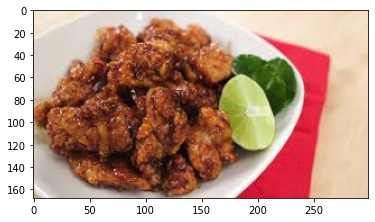

In [11]:
filenames = df_train.path_img
sample = random.choice(filenames)
image = imread(IMG_TRAIN_PATH + sample)

print(image.shape)
print(np.max(image))
plt.imshow(image);

Dataframe balanceado:

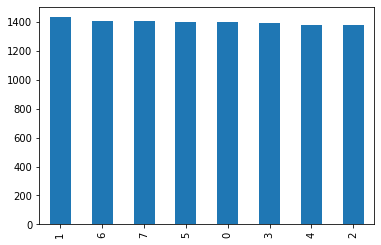

In [12]:
df_train['label'].value_counts().plot.bar();

Generación de imagenes aleatorias para categorizar los labels:

In [ ]:
CATEGORY_TO_FIND = 1
df_i = df_train.loc[df_train['label']==CATEGORY_TO_FIND]
df_i.reset_index(drop=True, inplace=True)
sample = random.randint(0,len(df_i))
image = imread(IMG_TRAIN_PATH + df_i.path_img[sample])
print('LABEL:',df_i.label[sample])
print(image.shape)
print(np.max(image))
plt.imshow(image)

In [ ]:
categories = ['burger','chicken','donut','fries','hotdog','pizza','sandwich','potatoes']

Cambio de size de la imagen:

In [ ]:
plt.figure(figsize=(12, 12))

sample = random.choice(filenames)
image = imread(IMG_TRAIN_PATH + sample)
imagesmall = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

print("Tamaño imagen original:", image.shape)
print("Tamaño imagen reshape:", imagesmall.shape)

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(imagesmall);

In [26]:
extensiones = df_train['path_img'].str.split('.',expand=True)[1]

In [27]:
extensiones.head()

0    jpeg
1    jpeg
2    jpeg
3    jpeg
4    jpeg
Name: 1, dtype: object

In [28]:
extensiones.value_counts()

jpeg    11189
Name: 1, dtype: int64

In [29]:
len(extensiones)==extensiones.value_counts()

jpeg    True
Name: 1, dtype: bool

In [15]:
extensiones.head()

0    [all_imgs/bc7696f4-1460-4d0b-a63d-f84b3be4da0f...
1    [all_imgs/f8d50663-60d8-4da5-a8b8-79f954aec503...
2    [all_imgs/51df0f29-758b-4741-ab74-a0ff8e21c044...
3    [all_imgs/f61b81d3-3b79-4162-b4d6-4f1b39518c4c...
4    [all_imgs/b21e0668-bd09-4794-9e90-da8ecffc4c1c...
Name: path_img, dtype: object

In [ ]:
df_test=pd.read_csv(TEST_PATH)

In [ ]:
df_test.info()

In [ ]:
df_test.head()

## OBSERVACIONES:

- Tamaño del train: 11189 filas y 3 columnas
  - idx_train
  - path_img
  - label
- Tamaño del test: 4797 filas y 2 columnas
  - idx_test
  - path_img
- Todas las imagenes en la misma carpeta ***/all_imgs***
- 8 categorías:  
  0. Burger
  1. Chicken
  2. Donut
  3. Fries
  4. Hotdog
  5. Pizza
  6. Sandwich
  7. Potatoes 
- Data de entrenamiento balanceada
- Imagenes de distintas dimensionalidad
- Imagenes a color 





### Planteamiento inicial:

- Utilizar redes convolucionales al tratarse de imagenes.
- Posibilidad de subdividir en carpetas las imgs
